<a href="https://colab.research.google.com/github/MrCalmTam/AI_ANN/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import fashion_mnist
from keras.models import Sequential #Sequnetial: la mang ANN, lop nay nos ke tiep nhau (mo ta mang ANN theo tung lop)
from keras.models import load_model
from keras.layers import Dense# Dense = full_connectied : ket noi day du theo cac te bao
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [7]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_images.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000, 28, 28)


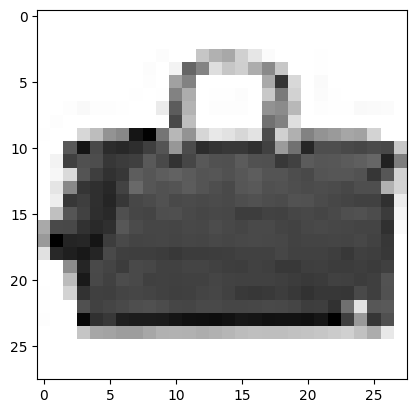

Cái này là: 8


In [8]:

hinh = train_images[99]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cái này là:", train_labels[99])
     

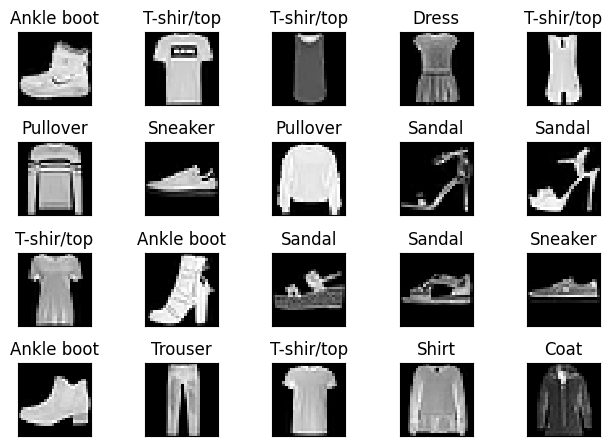

In [9]:
class_name = [ "T-shir/top" ,"Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(20): 
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])

In [10]:
from keras.models import Sequential #Sequnetial: la mang ANN, lop nay nos ke tiep nhau (mo ta mang ANN theo tung lop)
from keras.layers import Dense  # Dense = full_connectied : ket noi day du theo cac te bao 

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (28*28,),))  # them mot lop: add, them mot full_connectied: Dense, 512: so noron duoc them 
model.add(Dense(1024, activation = 'relu')) 
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))      
model.add(Dense(10, activation = 'softmax')) 

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [11]:

train_images = train_images.reshape((60000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [12]:

test_images = test_images.reshape((10000,28*28))  #reshape: chuyen anh 2 chieu sang anh 1 chieu 
test_images = test_images.astype('float32')/255
test_images.shape

(10000, 784)

In [13]:

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
train_labels.shape

(60000, 10)

In [14]:

test_labels.shape 
     

(10000, 10)

In [15]:
#compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])  #chon bo toi uu, danh gia do mat mat, do chinh xac  
#train
model.fit(train_images, train_labels, epochs = 10, batch_size = 128 ) # epochs: so lan hoc, bath_size: so du lieu moi lan hoc
#evaluate
test_loss , test_acc = model.evaluate(test_images, test_labels)
print('Độ mất mát :', test_loss)
print('Độ chính xác :', test_acc)

Epoch 1/10
469/469 [==============================] - 25s 44ms/step - loss: 0.7517 - accuracy: 0.7171
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 0.4387 - accuracy: 0.8404
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3796 - accuracy: 0.8626
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.3452 - accuracy: 0.8749
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.3245 - accuracy: 0.8821
Epoch 6/10
469/469 [==============================] - 22s 48ms/step - loss: 0.3052 - accuracy: 0.8882
Epoch 7/10
469/469 [==============================] - 21s 46ms/step - loss: 0.2909 - accuracy: 0.8933
Epoch 8/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2783 - accuracy: 0.8969
Epoch 9/10
469/469 [==============================] - 22s 47ms/step - loss: 0.2664 - accuracy: 0.9018
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 0.3669 

1/1 [==============================] - 0s 146ms/step


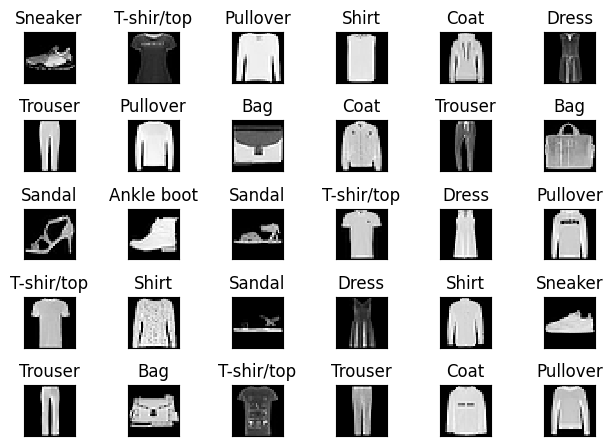

In [16]:
x_images = test_images[70:100]
pred = np.argmax(model.predict(x_images), axis=-1)
x_images = np.reshape(x_images, (30,28,28,1))

for i in range(30): 
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])